In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load(positions, proc):
    weight_match = positions[:, 2][positions[:, 1] == proc]
    return sum(weight_match)

def nobj(positions, proc):
    return len(positions[:, 1][positions[:, 1] == proc])
    
    
    

In [76]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches 

# Function to read the file and return the positions as a numpy array
def read_positions(file_path):
    # Load the positions from the file
    data = np.loadtxt(file_path)
    return data

# Function to plot the positions as a dot plot
def plot_positions(positions, title, hlist):
    # Extract x, y, and z coordinates
    proc = positions[:, 1]
    weight = positions[:, 2]
    x = positions[:, 3]
    y = positions[:, 4]
    
    print(weight)
    colors = ['grey'] * len(proc)
    
    #if h == -1:
    if hlist is None:
        colors = proc
    
    elif hlist is not None:
        for i in range(len(proc)):
            p = proc[i]
            if p not in hlist:
                colors[i] = "grey"
            else:
                colors[i] = plt.cm.tab20b(hlist.index(p) / len(hlist))
                    
       

    # Create a scatter plot of x vs y (2D dot plot)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=colors, cmap='tab20b',
                #s=1e4 * weight, 
                marker='x')

    
    if hlist is None:
        labels = [i for i in range(len(np.unique(proc)))]
        legend_handles = [mpatches.Patch(color=scatter.cmap(i / (len(labels) - 1)), label=labels[i]) for i in range(len(labels))]
        plt.legend(handles=legend_handles, title="Processor")
    else:
        labels = hlist
        legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab20b(i / len(hlist)), markersize=10, label=labels[i]) for i in range(len(labels))]
        plt.legend(handles=legend_handles, title="Processor")
        
    
   

    
    
    # Add a legend for the colors
    
    #plt.legend(handles=legend_elements)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.show()
    
    
    

# Main script to read the file and plot the data
def plot_file(file_path, title, hlist = None):
    positions = read_positions(file_path)
    plot_positions(positions, title, hlist)
    
    # nobjs = 0
    # for i in range(64):
    #     nobjs += nobj(positions, i)
    #     print("Proc: ", i, "Nobj: ", nobj(positions, i), " Load: ", load(positions, i))
    
    # print("Average n obj: ", nobjs/64)


In [ ]:
plot_file("2d-comm-64x64-iter-imb3.txt", "Comm")
plot_file("2d-cent-64x64-iter-imb3.txt", "Centroid")

In [ ]:
# ALLCOLOR 2D FIGURES 
proc=None
#Internal comm Mbytes = 38.750000, External comm Mbytes = 1.250000
#Position spread = 32.598757, Max PE load = 0.447921

plot_file("8x256orig.txt", "Original Mapping")

# Internal comm Mbytes = Internal comm Mbytes = 38.405762, External comm Mbytes = 1.594238
#  Position spread = 31.287914, Max PE load = 0.223279
plot_file("cent-8x256-inject4.txt", "Centroid (Proc 4 load doubled)")

# Internal comm Mbytes = 33.687744, External comm Mbytes = 6.312256
# Position spread = 40.052373, Max PE load = 0.220282
plot_file("comm-8x256-inject4.txt", "Comm (Proc 4 load doubled)")

#  migrations=7738(47.23%), ratioToGreedy=1.001
# Internal comm Mbytes = 23.912354, External comm Mbytes = 16.087646
# Position spread = 38.758302,  Max load: 0.238003
plot_file("greedy-8x256-inject4.txt", "Greedy Refine (Proc 4 load doubled)")


# save all four figures in 4 pdfs in the dir figures/noiter-inject4
plt.savefig("figures/noiter-inject4/comm-8x256-allcolor.pdf")
plt.savefig("figures/noiter-inject4/cent-8x256-allcolor.pdf")
plt.savefig("figures/noiter-inject4/greedy-8x256-allcolor.pdf")
plt.savefig("figures/noiter-inject4/orig-8x256-allcolor.pdf")


[1.18e-04 3.10e-05 3.00e-05 ... 2.20e-05 2.50e-05 5.00e-05]


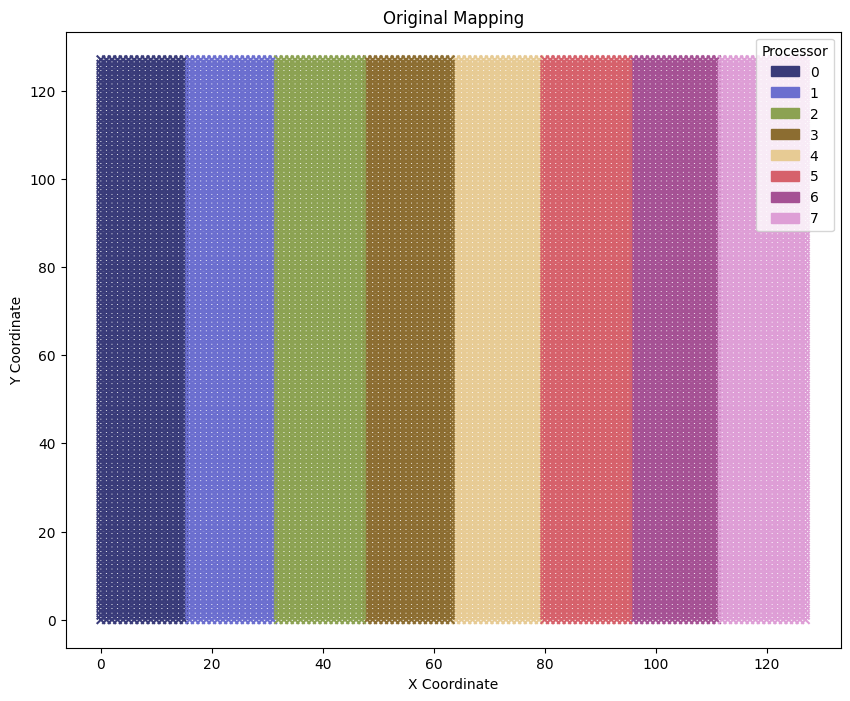

[1.18e-04 3.10e-05 3.00e-05 ... 2.20e-05 2.50e-05 5.00e-05]


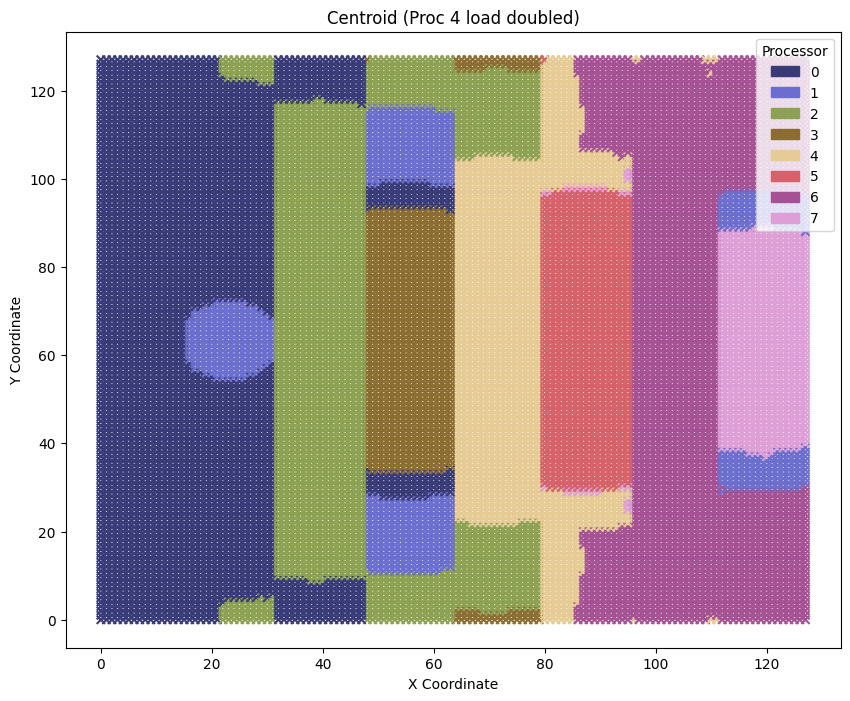

[1.18e-04 3.10e-05 3.00e-05 ... 2.20e-05 2.50e-05 5.00e-05]


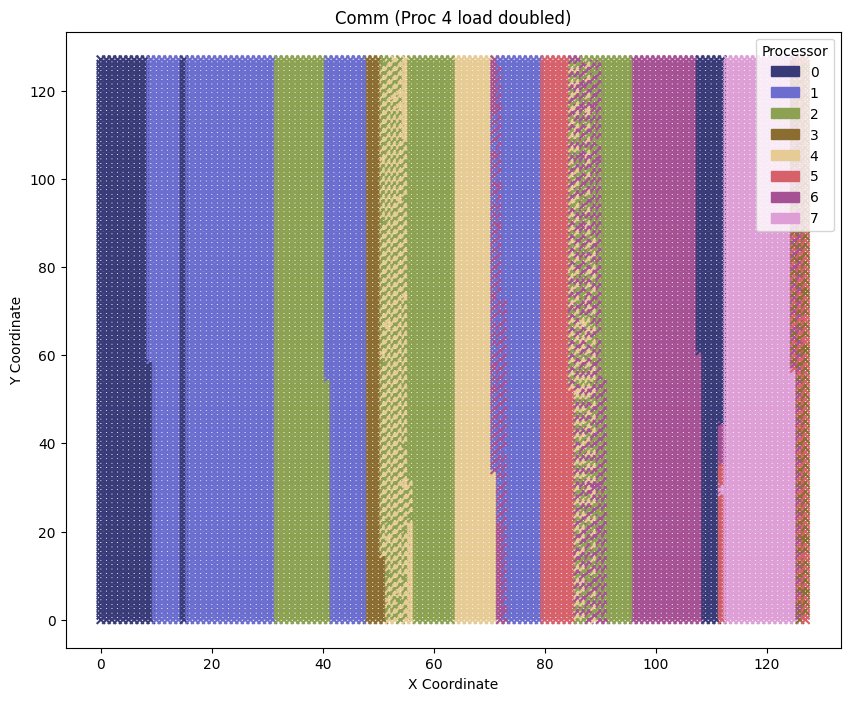

[1.18e-04 3.10e-05 3.00e-05 ... 2.20e-05 2.50e-05 5.00e-05]


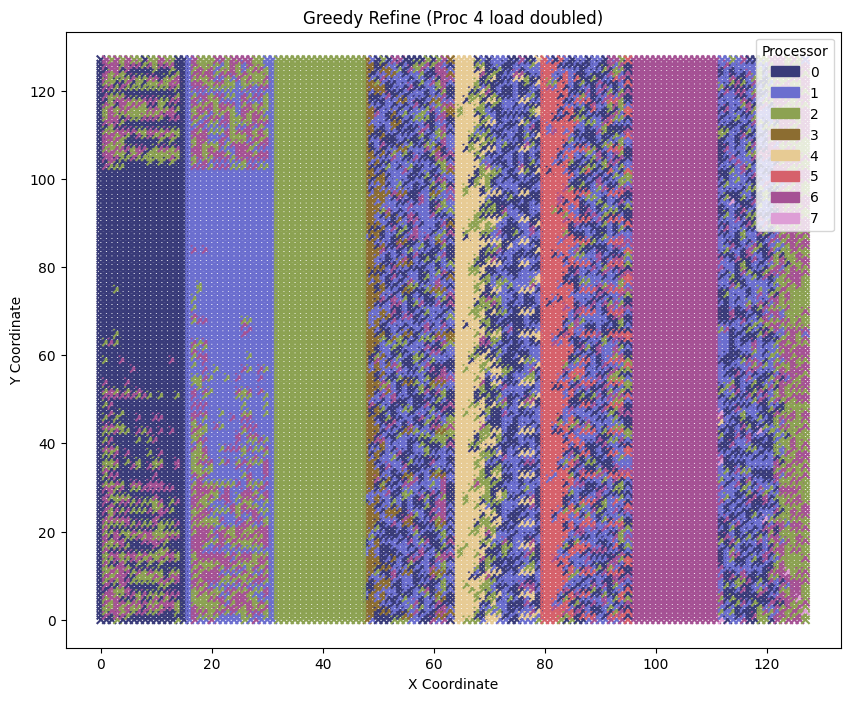

<Figure size 640x480 with 0 Axes>

In [ ]:
proclist = None
#Internal comm Mbytes = 38.750000, External comm Mbytes = 1.250000
#Position spread = 32.598757, Max PE load = 0.447921

plot_file("8x256orig.txt", "Original Mapping", proclist)

# Internal comm Mbytes = Internal comm Mbytes = 38.405762, External comm Mbytes = 1.594238
#  Position spread = 31.287914, Max PE load = 0.223279
plot_file("cent-8x256-inject4.txt", "Centroid (Proc 4 load doubled)", proclist)

# Internal comm Mbytes = 33.687744, External comm Mbytes = 6.312256
# Position spread = 40.052373, Max PE load = 0.220282
plot_file("comm-8x256-inject4.txt", "Comm (Proc 4 load doubled)", proclist)

#  migrations=7738(47.23%), ratioToGreedy=1.001
# Internal comm Mbytes = 23.912354, External comm Mbytes = 16.087646
# Position spread = 38.758302,  Max load: 0.238003
plot_file("greedy-8x256-inject4.txt", "Greedy Refine (Proc 4 load doubled)", proclist)

